# About the Diabete dataset

This a REGRESSION problem.
Ten numeric predictive variables: age, sex, body mass index, average blood pressure, and six blood serum measurements. They were obtained for each of n = 442 diabetes patients, as well as the response of interest, a quantitative measure (integer between 25 and 346) of disease progression one year after baseline.

## The goal is to predict as well as possible the future disease progression one year after (target value) as a function of the 10 predictive variables.

Note: Each of the 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).


    #Plan de l'analyse 
    
0) Introduction
1) Pre-processing de la base de données diabète
2) Visualisation des données et compréhension de la biologie
3) Test des différents algorithmes de régression et comparison des résultats
4) Test des différents algorithmes sur le dataset réduit


## 1) Loading and pre-processing Diabete dataset

In [1]:

import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.neural_network import MLPRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.tree import DecisionTreeRegressor as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.neighbors import KNeighborsRegressor
# Load the diabetes dataset

diabetes = datasets.load_diabetes()

# Print dataset description
print(diabetes.DESCR)





.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
http://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Brad

## 2) Visualisation des données et compréhension de la biologie

    #Sens biologique des variables

-Age :
-Sex :
-BMI = IMC, doit être positivivement corrélé à la progression du diabete (type 2)
-BP = Blood pressure
-S1 = TC, total cholesterol 
-S2 = ldl, le "mauvais cholesterol", qui crée des amas de graisse dans les vaisseaux sanguins quand la pression artérielle monte, lipoprotéine transportant le cholestérol dans le sang
-S3 = hdl, le "bon cholesterol", lipoprotéine transportant le cholesterol dans le sang vers le foie 
-S4 = tch , inconnu
-S5 = ltg, lamorigine
-s6 = glu, taux de glucose

In [2]:




#Create a dataframe

arr = np.append(diabetes.data, np.expand_dims(diabetes.target, axis=1), axis=1)
col = ['age', 'sex', 'body_mass_i', 'avg_blood_pressure', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'target']
df = pd.DataFrame(arr, columns=col)
print(df.corr())



                         age       sex  body_mass_i  avg_blood_pressure  \
age                 1.000000  0.173737     0.185085            0.335427   
sex                 0.173737  1.000000     0.088161            0.241013   
body_mass_i         0.185085  0.088161     1.000000            0.395415   
avg_blood_pressure  0.335427  0.241013     0.395415            1.000000   
S1                  0.260061  0.035277     0.249777            0.242470   
S2                  0.219243  0.142637     0.261170            0.185558   
S3                 -0.075181 -0.379090    -0.366811           -0.178761   
S4                  0.203841  0.332115     0.413807            0.257653   
S5                  0.270777  0.149918     0.446159            0.393478   
S6                  0.301731  0.208133     0.388680            0.390429   
target              0.187889  0.043062     0.586450            0.441484   

                          S1        S2        S3        S4        S5  \
age                 0.26006

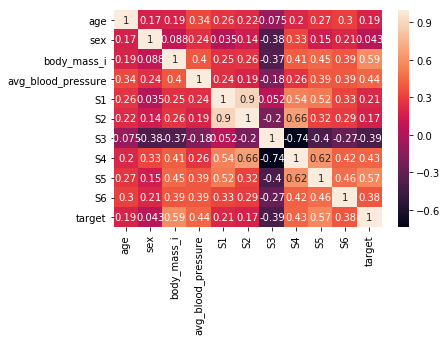

In [26]:
# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns
corr = df.corr()
sns.heatmap(df.corr(), annot=True,)


    #Interpretation de la matrice de corrélation
    
1) Tête "usuelle" d'une matrice de correlation (diagonale jaune).
2) Variables s1 et s2 très corrélées entre elles :
        -On pourrait envisager d'en enlver une sur deux/ moyenner, si on avait trop de points (optimisation temps de calcul);
        -Interprétation biologique : OK car ce sont le taux de cholestérol et le taux de hdl (mauvais cholestérol).
3) Correlation négative entre s2 et s3 : OK car le taux de hdl et ldl sont "contraires" vis à vis du tc. Mais étonnant qu'il n'y ait que peu de corrélation entre s1 et s3

As we can see, it will make sense to perform feature selection since age,sex,S1,S2 are not correlated with the target.

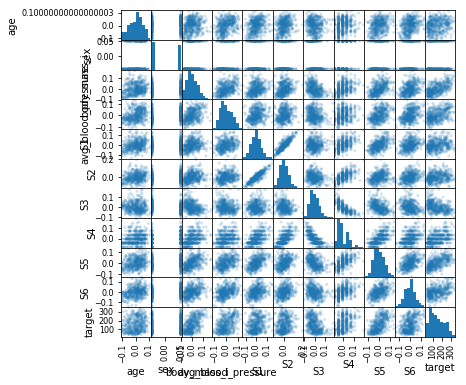

In [24]:
#Let's plot the scatter mattrix to understand better the distribution of the data.
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='hist')
plt.show()

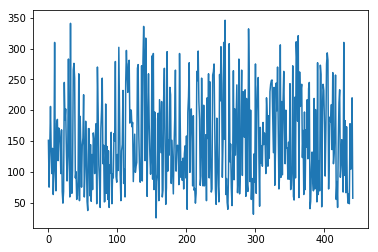

In [25]:
#on représente les valeurs de la target
plt.plot(diabetes.target[:])

    #Interprétation

1) Distribution gaussienne apparemment de S1 : OK.
2) S4 à un comportement particulier car seuil : Attention à notre problème de régression linéaire
3) Nous allons centrer-réduire la target, sur les données d'entraînement (pour éviter d'inclure de la donnée test dans l'entraînement)
4) Pas d'outlier visible


#On se doute à ce point qu'on pourra modifier les features pour ne garder que les plus corrélées avec la target, mais pas forcément entre elles, et dont la distribution est adéquate pour une regression.

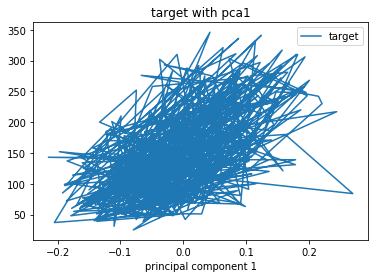

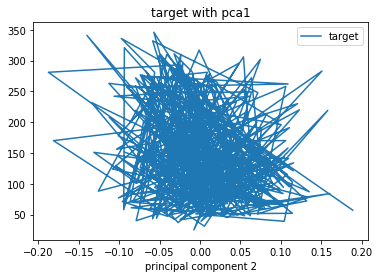

In [57]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(diabetes.data)
#print (pca.explained_variance_ratio_.sum())
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
#principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1'])
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf.plot(x='principal component 1',y='target',title='target with principal component 1')
finalDf.plot(x='principal component 2',y='target',title='target with principal component 2')

It seems clear that the first component behave linearly with respect to the target.
For the testing part, we will test 3 different methods for all algorithms:
1) using all features
2) using features that we have identified with the correlation matrix
3) using the features given by the pca

## 3) Test des différents algorithmes de régression et comparison des résultats

##  I) 	Baseline method: Linear Regression

### 1) All features

In [87]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', clf.coef_)

# Make predictions using the testing set
y_pred = clf.predict(X_test)

# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (max_value=1 for perfect prediction): %.2f' % clf.score(X_test,y_test))



Coefficients: 
 [  0.63211066  -3.34437225   7.04630166   4.32017187 -12.14404113
   6.7475051    2.42645329   3.71689394   9.47617714   0.8512562 ]
Mean squared error (on test set): 0.53
Variance score (max_value=1 for perfect prediction): 0.41


### 2) Selected Features

In [64]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)

clf = linear_model.LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (max_value=1 for perfect prediction): %.2f' % clf.score(X_test,y_test))

Mean squared error (on test set): 0.51
Variance score (max_value=1 for perfect prediction): 0.44


### 3) Analyse Composante Principale

##  II) 	Support Vector Regression

### 1) All features

In [88]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{
                'kernel': ['poly', 'linear', 'rbf','sigmoid'],
                'degree': [i for i in range(1, 7)],
                'C': [i for i in range(1,10)],
                'epsilon': [0.1, 0.3 , 0.5, 1, 10],
                'gamma':['auto', 'scale']
              }]

clf = GridSearchCV(SVR(), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'C': 6, 'degree': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'sigmoid'}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.42150019107036085
R squared score on training set: 0.5252017399699569


### 2) Selected features

In [76]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{
                'kernel': ['poly', 'linear', 'rbf','sigmoid'],
                'degree': [i for i in range(1, 7)],
                'C': [i for i in range(1,10)],
                'epsilon': [0.1, 0.3 , 0.5, 1, 10],
                'gamma':['auto', 'scale']
              }]

clf = GridSearchCV(SVR(), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'C': 8, 'degree': 1, 'epsilon': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}
Mean squared error (on test set): 0.48
R squared score on testing set: 0.4702752109703252
R squared score on training set: 0.5143491738189234


### 3) Principal Component Features

##  III) 	Lasso Regression

### 1) All features

In [82]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': [0.0000001, 0.0000001,0.1,1]}]
              
clf = GridSearchCV(Lasso(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 1e-07}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.4147435632731532
R squared score on training set: 0.5310752008075412


### 2) Selected features

In [84]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': [0.000000001, 0.00000001,0.1,1]}]
              
clf = GridSearchCV(Lasso(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 1e-09}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.4392685138819906
R squared score on training set: 0.4983825739756882


### 3) Principal Component features

##  IV) 	Ridge Regression

### 1) All features

In [91]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': np.linspace(0.0001, 0.1, 100)}]
              
clf = GridSearchCV(Ridge(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'alpha': 0.0011090909090909092}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.4160226117514001
R squared score on training set: 0.5309912188290182


### 2) Selected features

In [92]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': np.linspace(0.0001, 0.1, 100)}]
              
clf = GridSearchCV(Ridge(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'alpha': 0.057618181818181825}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.44300052338554363
R squared score on training set: 0.4977609268244608


### 3) Principal Component features

##  V) 	ElasticNet Regression

### 1) All features

In [95]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': np.linspace(0.00001,1,100),
               'l1_ratio': np.linspace(0.01,0.99,100)}]
              
clf = GridSearchCV(ElasticNet(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 1e-05, 'l1_ratio': 0.594040404040404}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.4168427865197408
R squared score on training set: 0.530874274209838


### 2) Selected features

In [99]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha': np.linspace(0.00001,1,100),
               'l1_ratio': np.linspace(0.01,0.99,100)}]
              
clf = GridSearchCV(ElasticNet(), param_grid, cv=3)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 1e-05, 'l1_ratio': 0.01}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.43956654769270354
R squared score on training set: 0.49837971962918826


### 3) Principal Component features

##  VI) 	MLP Regression

### 1) All features

In [104]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'hidden_layer_sizes': [(x,y) for x,y in zip(iter(range(50,500,50)),iter(range(50,500,50)))],
               'alpha': np.linspace(0.00001, 1, 5),
               'learning_rate': ['constant'],
               'activation':['relu'],
               'momentum':[0.5]}]
        
clf = GridSearchCV(MLPRegressor( solver='adam',
                batch_size='auto', learning_rate_init=0.01, max_iter=1000,
                shuffle=True,random_state=42, tol=0.0001, verbose=False, warm_start=False,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08), param_grid, cv=3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'activation': 'relu', 'alpha': 0.2500075, 'hidden_layer_sizes': (450, 450), 'learning_rate': 'constant', 'momentum': 0.5}
Mean squared error (on test set): 0.48
R squared score on testing set: 0.4753999426600273
R squared score on training set: 0.5612814354118214


In [ ]:
### 2) Selected features

In [105]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'hidden_layer_sizes': [(x,y) for x,y in zip(iter(range(50, 500, 50)),iter(range(50, 500, 50)))],
               'alpha': np.linspace(0.00001, 1, 5),
               'learning_rate': ['constant'],
               'activation':['relu'],
               'momentum':[0.5]}]
        
clf = GridSearchCV(MLPRegressor( solver='adam',
                batch_size='auto', learning_rate_init=0.01, max_iter=1000,
                shuffle=True,random_state=42, tol=0.0001, verbose=False, warm_start=False,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08), param_grid, cv=3)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'activation': 'relu', 'alpha': 0.7500025, 'hidden_layer_sizes': (450, 450), 'learning_rate': 'constant', 'momentum': 0.5}
Mean squared error (on test set): 0.50
R squared score on testing set: 0.44985093724808756
R squared score on training set: 0.4859450179667622


### 3) Principal Component features

##  VII) 	Decision Tree Regressor

### 1) All features

In [106]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{
    'max_depth' : [i for i in range(1, 25, 1)],
   'min_samples_split' : [i for i in range(2, 20, 1)]
              }]
clf = GridSearchCV(dt(), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'max_depth': 2, 'min_samples_split': 3}
Mean squared error (on test set): 0.71
R squared score on testing set: 0.2216359905823414
R squared score on training set: 0.44906837555625057


### 2) Selected features

In [107]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{
    'max_depth' : [i for i in range(1, 25, 1)],
   'min_samples_split' : [i for i in range(2, 20, 1)]
              }]
clf = GridSearchCV(dt(), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'max_depth': 2, 'min_samples_split': 2}
Mean squared error (on test set): 0.71
R squared score on testing set: 0.2216359905823414
R squared score on training set: 0.44906837555625045


### 3) Principal Component features

##  VIII) 	Random Forest Regressor

### 1) All features

In [108]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'n_estimators':[i for i in range (2,100)],
               'max_depth':[i for i in range(1,6)],
                'min_samples_split':[2,3]}]
clf = GridSearchCV(RandomForestRegressor(random_state=42,), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 93}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.4389881507455825
R squared score on training set: 0.7291927515884905


In [ ]:
### 2) Selected features

In [109]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'n_estimators':[i for i in range (2,100)],
               'max_depth':[i for i in range(1,6)],
                'min_samples_split':[2,3]}]
clf = GridSearchCV(RandomForestRegressor(random_state=42,), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 93}
Mean squared error (on test set): 0.49
R squared score on testing set: 0.4568638216455575
R squared score on training set: 0.5653554785024004


### 3) Principal Component features

##  IX) 	kNN Regressor

### 1) All features

In [113]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'n_neighbors':[i for i in range (2,30)],
               'weights':['uniform','distance']}]
clf = GridSearchCV(KNeighborsRegressor(),param_grid,cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))
print("Mean squared error (on training set): %.2f"
      % mean_squared_error(y_train, clf.predict(X_train)))
print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))
##Overfitting Here!!

{'n_neighbors': 18, 'weights': 'distance'}
Mean squared error (on test set): 0.50
Mean squared error (on training set): 0.00
R squared score on testing set: 0.45104000713984505
R squared score on training set: 1.0


### 2) Selected features

In [115]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'n_neighbors':[i for i in range (2,30)],
               'weights':['uniform','distance']}]
clf = GridSearchCV(KNeighborsRegressor(),param_grid,cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'n_neighbors': 27, 'weights': 'uniform'}
Mean squared error (on test set): 0.47
R squared score on testing set: 0.47805280640698733
R squared score on training set: 0.49696610373883454


### 3) Principal Component features

##  X) 	Adaboost Regressor

### 1) All features

In [6]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)

param_grid = [{'loss' : ['ls'],
               'learning_rate':[0.0001,0.001,0.01,0.1,1],
               'n_estimators': [i for i in range(50,500,50)],
               'min_samples_split': [2],
               'max_depth': [i for i in range(1,5)]}]
clf = GridSearchCV(GradientBoostingRegressor(),param_grid,cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))
print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))


{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 150}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.44402249358345003
R squared score on training set: 0.6143857516827027


In [ ]:
### 2) Selected features


In [5]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'loss' : ['ls'],
               'learning_rate':[0.0001,0.001,0.01,0.1,1],
               'n_estimators': [i for i in range(50,500,50)],
               'min_samples_split': [2],
               'max_depth': [i for i in range(1,5)]}]
clf = GridSearchCV(GradientBoostingRegressor(),param_grid,cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))
print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'learning_rate': 0.1, 'loss': 'ls', 'max_depth': 1, 'min_samples_split': 2, 'n_estimators': 100}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.4200240981268548
R squared score on training set: 0.57357664769602


In [ ]:
### 3) Principal Component features


In [ ]:
##  XI) 	Gaussian Process Regressor

In [ ]:
### 1) All features

In [11]:
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)

param_grid = [{'alpha' : [1e-10, 1e-8, 1e-6,1e-4,1e-2,1e-1]}]
clf = GridSearchCV(GaussianProcessRegressor(kernel=DotProduct()+WhiteKernel(), random_state=0), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))
print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 0.01}
Mean squared error (on test set): 0.53
R squared score on testing set: 0.42125998788924246
R squared score on training set: 0.49074674839071825


In [ ]:
### 2) Selected features

In [10]:
df_mod = df[['body_mass_i', 'avg_blood_pressure', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)
mean = y_train.mean()
std = y_train.std()
y_train = ((y_train-mean)/std)
y_test = ((y_test-mean)/std)
param_grid = [{'alpha':[1e-10, 1e-8, 1e-6,1e-4,1e-2,1e-1]}]
clf = GridSearchCV(GaussianProcessRegressor(kernel=DotProduct()+WhiteKernel(), random_state=0), param_grid, cv=3)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(clf.best_params_)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))
print('R squared score on testing set:', clf.score(X_test,y_test))
print('R squared score on training set:', clf.score(X_train,y_train))

{'alpha': 1e-08}
Mean squared error (on test set): 0.51
R squared score on testing set: 0.4355540024824772
R squared score on training set: 0.4689084108710775


test sur la nouvelle base (c'est deja fait')


    #Création de la nouvelle database

Nous avons l'intuition que certaines variables sont peu explicatives et que les algorithmes pourraient mieux apprendre en se concentrant sur les features portant l'information (pour éviter une sur-complexification de l'algo).

On garde ici que les 3 features les plus corrélées (en valeur absolue) à la Target : BMI, S3, S5

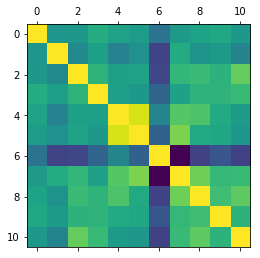

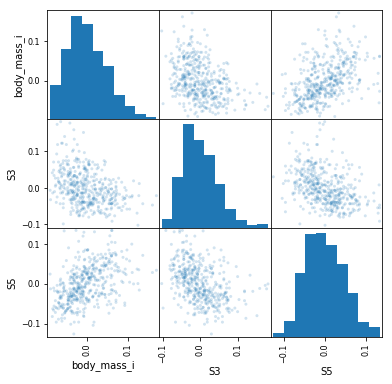

In [27]:
#print (df.head())

import warnings
warnings.simplefilter(action='ignore', category=[Warning])

df_mod = df[['body_mass_i', 'S3', 'S5']]
X_train, X_test, y_train, y_test = train_test_split(df_mod, 
                                                    diabetes.target, test_size=0.15, random_state=42, shuffle=True)

#Visualisation
from pandas.plotting import scatter_matrix
plt.matshow(df.corr())
df.corr()
scatter_matrix(df_mod, alpha = 0.2, figsize = (6, 6), diagonal = 'hist')
plt.show()

    #Modèles statistiques

In [29]:
### MLP Reg ###
###############
from sklearn.neural_network import MLPRegressor
'''
param_grid = [{'hidden_layer_sizes':[(50,20)],
               'learning_rate': ['adaptive'],
               'activation':['tanh','relu'],
               'momentum':[0.8]}]
     
clf = GridSearchCV(MLPRegressor(hidden_layer_sizes=(50,20),activation='relu', solver='adam',
                batch_size='auto', learning_rate_init=0.01, max_iter=1000,
                shuffle=True,random_state=42, tol=0.0001, verbose=False, warm_start=False,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08), param_grid, cv=5)
''' 
clf = MLPRegressor(hidden_layer_sizes=(20,80,80,800,),  activation='relu', solver='adam', alpha=0.1,batch_size='auto',
               learning_rate='constant', learning_rate_init=0.01, power_t=0.5, max_iter=10000, shuffle=True,
               random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.8,
               nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999,
               epsilon=1e-08)

clf.fit(X_train, y_train)
#print(clf.best_params_)
y_pred = clf.predict(X_test)
# The mean squared error on test set
print("Mean squared error (on test set): %.2f"
      % mean_squared_error(y_test, y_pred))

# Explained variance score: 1 is perfect prediction
print('Variance score (max_value=1 for perfect prediction):',r2_score(y_test, y_pred))
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

Mean squared error (on test set): 2967.22
Variance score (max_value=1 for perfect prediction): 0.4568319979725094
0.48239443433906976
0.45683199797250945


In [ ]:
#Visualisation comparée des résultats